In [1]:
%cd /Users/gwg/local/dmcm
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn

from   sklearn import decomposition, mixture
import torch
from   torch.autograd import Variable
from   torch import optim, nn
from   torch.nn import functional as F

from   data import pinwheel
from   models import PinwheelAE, PinwheelVAE, load_trained_model
import plotutils

/Users/gwg/local/dmcm


# GMM on pinwheel data

In [2]:
DIRECTORY = 'data/pinwheel/ae'
X     = torch.load('%s/train.pth' % DIRECTORY)
state = torch.load('%s/model.pt'  % DIRECTORY, 
                   map_location={'cuda:0': 'cpu'})
model = PinwheelAE()
model.load_state_dict(state)

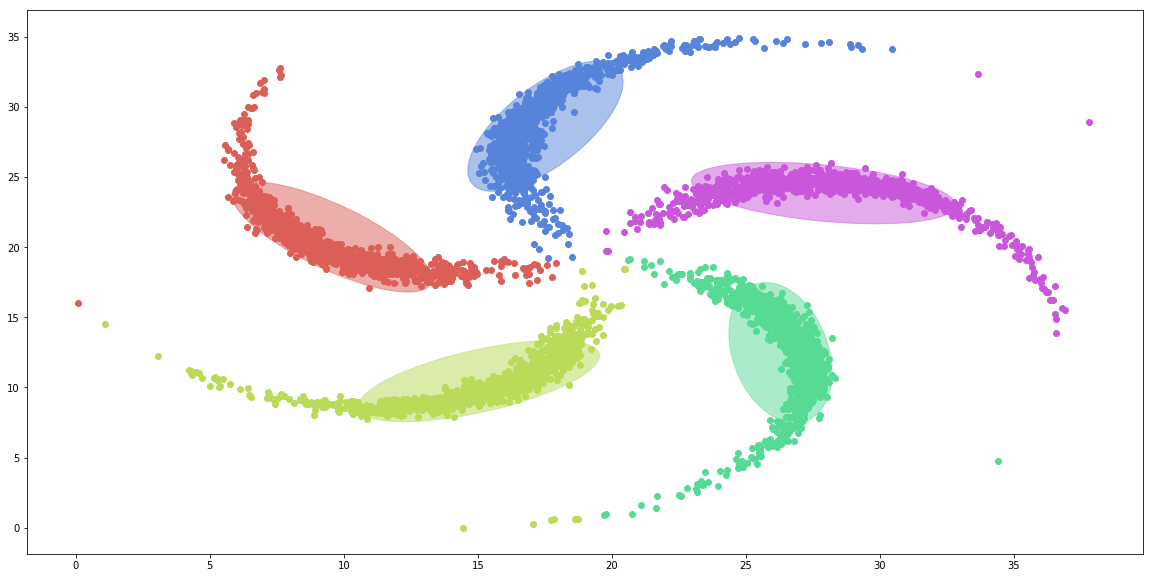

In [3]:
X_ = X.numpy()
gmm = mixture.GaussianMixture(n_components=5)
gmm.fit(X_)
plotutils.plot_gmm(X_, gmm=gmm)

# Autoencoder on pinwheel data

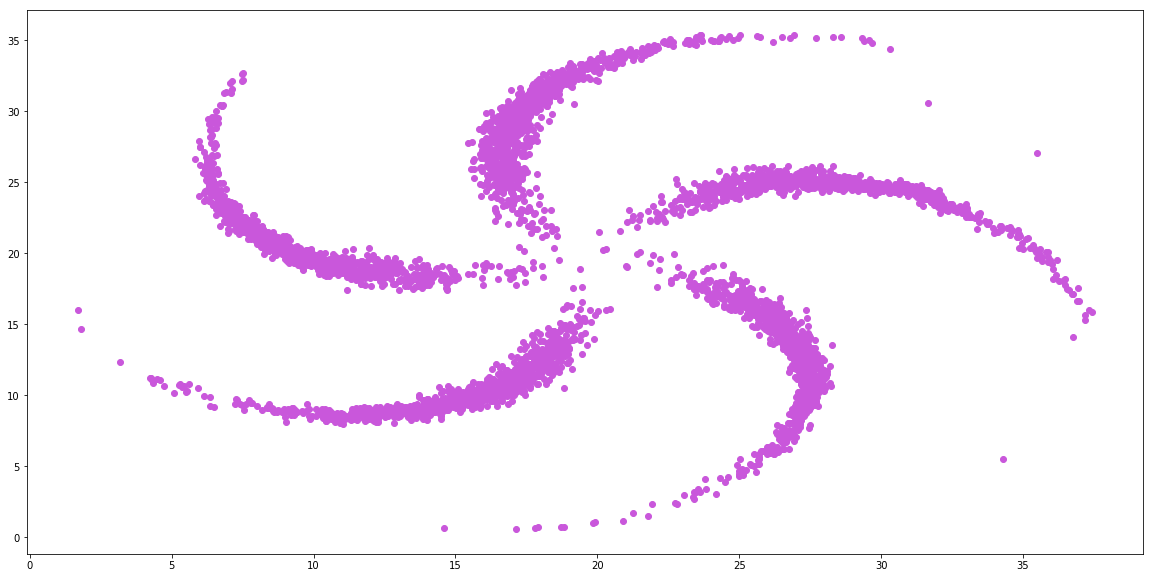

In [4]:
model.eval()
X_recon = model.forward(Variable(X)).data.numpy()
fig, ax = plt.subplots(1, 1, dpi=72)
fig.set_size_inches(20, 10)
plt.scatter(X_recon[:, 0], X_recon[:, 1], 
            color=seaborn.color_palette('hls', n_colors=5)[-1])

# Pinwheel VAE

torch.Size([5000, 2])


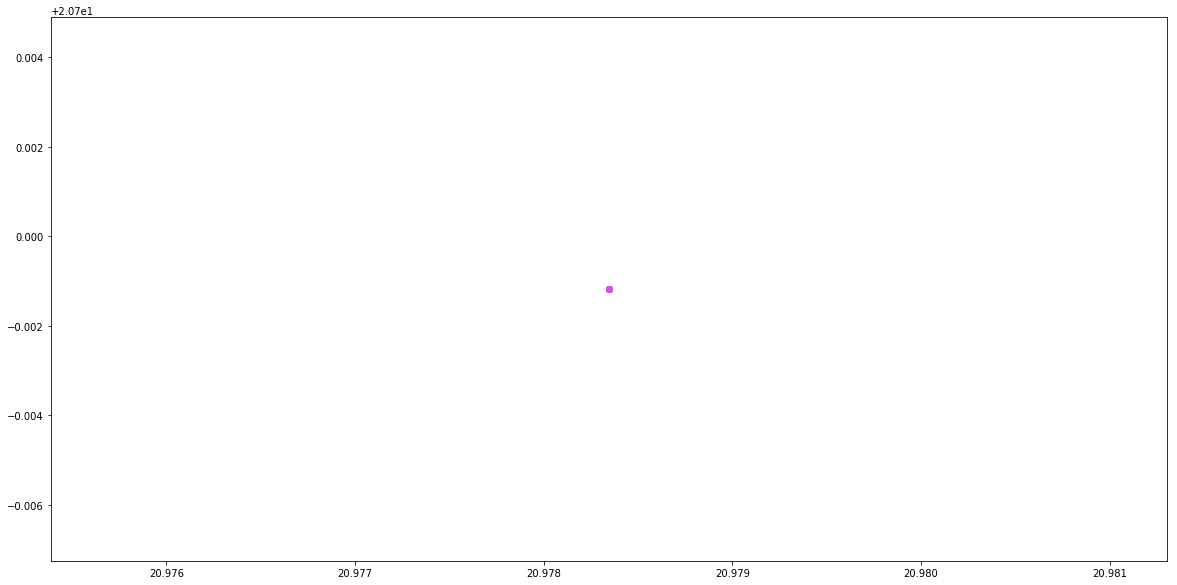

In [5]:
DIRECTORY = 'data/pinwheel/vae'
X     = torch.load('%s/train.pth' % DIRECTORY)
state = torch.load('%s/model.pt'  % DIRECTORY, 
                   map_location={'cuda:0': 'cpu'})
model = PinwheelVAE()
model.load_state_dict(state)
model.eval()

X_recon, _, _ = model.forward(Variable(X))
print(X_recon.shape)
fig, ax = plt.subplots(1, 1, dpi=72)
fig.set_size_inches(20, 10)
plt.scatter(X_recon[:, 0], X_recon[:, 1], 
            color=seaborn.color_palette('hls', n_colors=5)[-1])

# samples = Variable(torch.randn(500, 1024))
# # pca = decomposition.PCA(n_components=2)
# # points = pca.fit_transform(samples)
# points = model.decoder(samples).data
# plt.scatter(points[:, 0], points[:, 1])

In [ ]:
# xs = []
# ys = []
# rec = []
# kls = []
# with open('%s/out.txt' % DIRECTORY) as out:
#     for line in out:
#         parts = line.split('\t')
#         xs.append(int(parts[0]))
#         ys.append(float(parts[1].strip()))
#         rec.append(float(parts[2]))
#         kls.append(float(parts[3]))
# plt.scatter(xs, ys,  label='err')
# plt.scatter(xs, rec, label='recon')
# plt.scatter(xs, kls, label='kls')
# plt.legend()